In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import HistGradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('/content/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.isna().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


*null values to be treated!*

**DATA CLEANING**

In [6]:
def int_fetch(string):
    g = re.findall("[1-9,.]+ ", str(string))
    if g:
        return float(g[0])
    else:
        return 0

In [7]:
df.Mileage=df.Mileage.apply(int_fetch)
df.Mileage

,Mileage
0,26.60
1,19.67
2,18.20
3,0.77
4,15.20
...,...
6014,28.40
6015,24.40
6016,0.00
6017,18.90


In [8]:
df.Engine=df.Engine.apply(int_fetch)
df.Engine=df.Engine.astype(int)
df.Engine

,Engine
0,998
1,1582
2,1199
3,1248
4,1968
...,...
6014,1248
6015,0
6016,2498
6017,998


In [9]:
df.Power=df.Power.apply(int_fetch)
df.Power

,Power
0,58.16
1,126.20
2,88.70
3,88.76
4,0.80
...,...
6014,74.00
6015,71.00
6016,112.00
6017,67.10


In [11]:
df.Mileage=df.Mileage.fillna(df.Mileage.mean)

In [12]:
df.Engine=df.Engine.replace(0,round(np.mean(df.Engine)))

In [13]:
df.Power=df.Power.replace(0,round(np.median(df.Power)))

In [14]:
df.Seats=df.Seats.fillna(0)
df.Seats=df.Seats.replace(0,round(np.median(df.Seats)))

In [18]:
df=df.drop(['Unnamed: 0','Name','New_Price'],axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   int64  
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 517.4+ KB


-0.8458021355296015


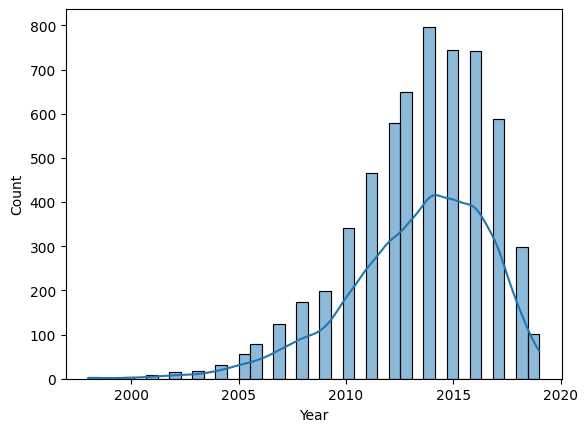

In [17]:
ax = sns.histplot(df.Year,kde='True')
print(df.Year.skew())

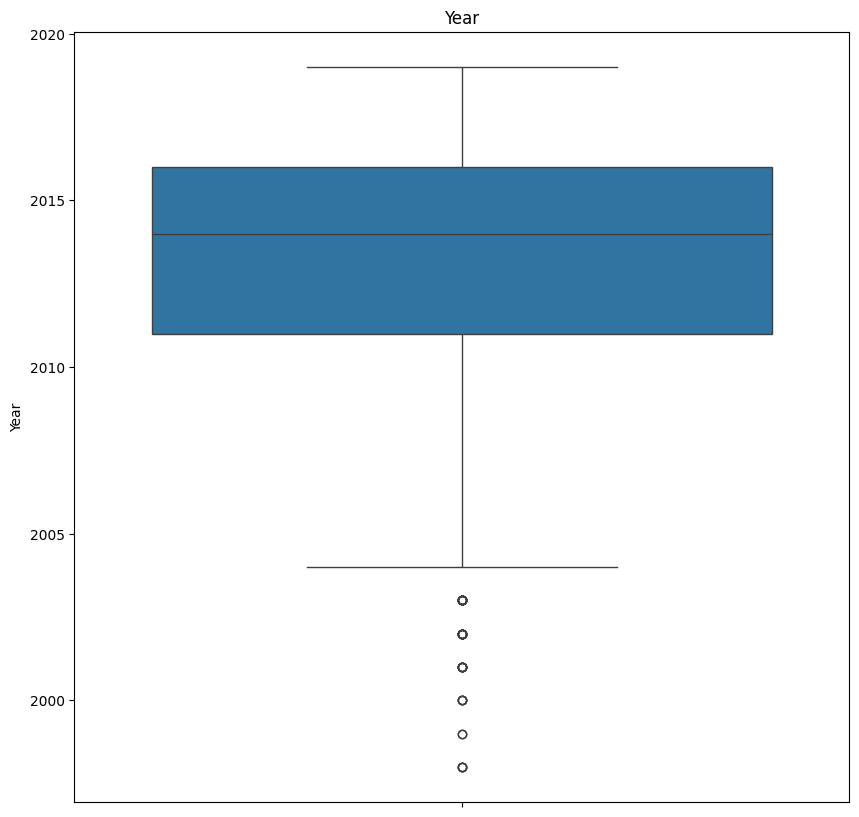

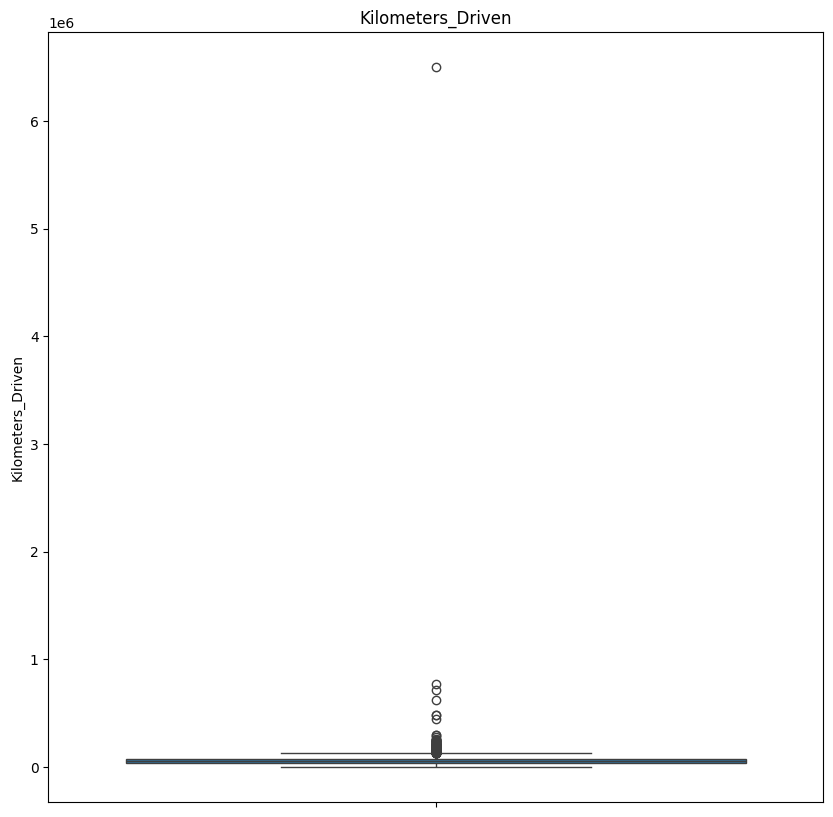

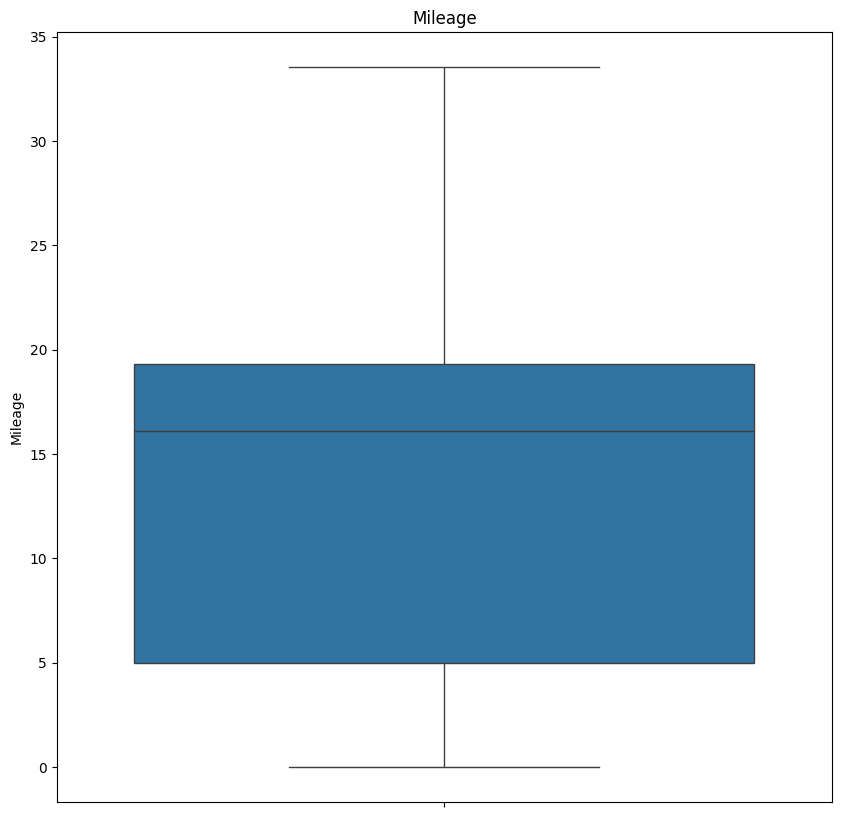

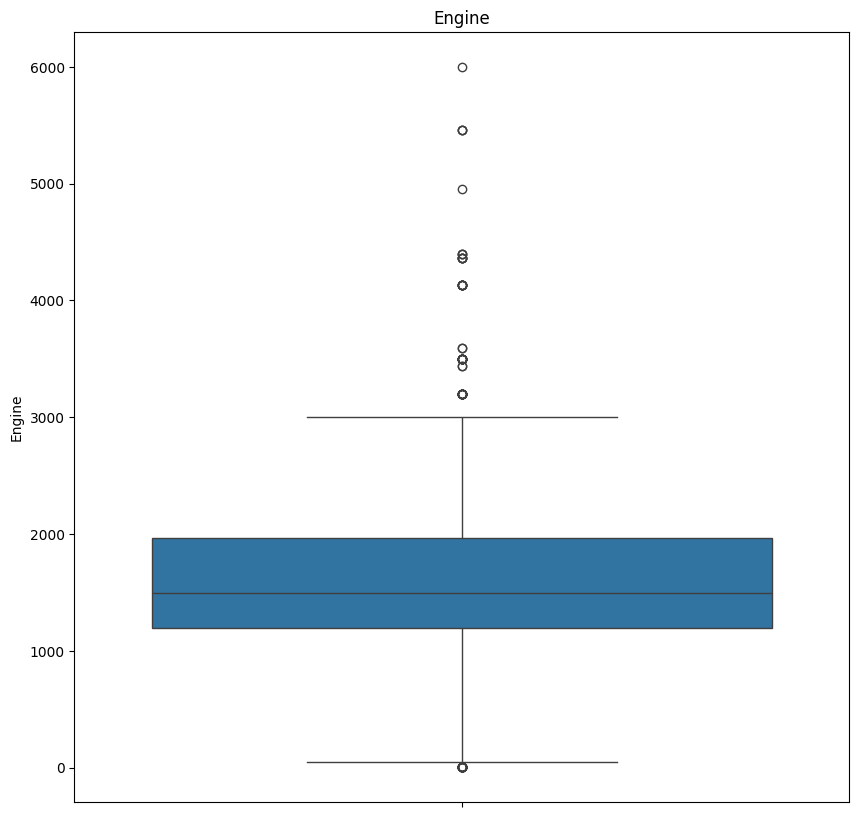

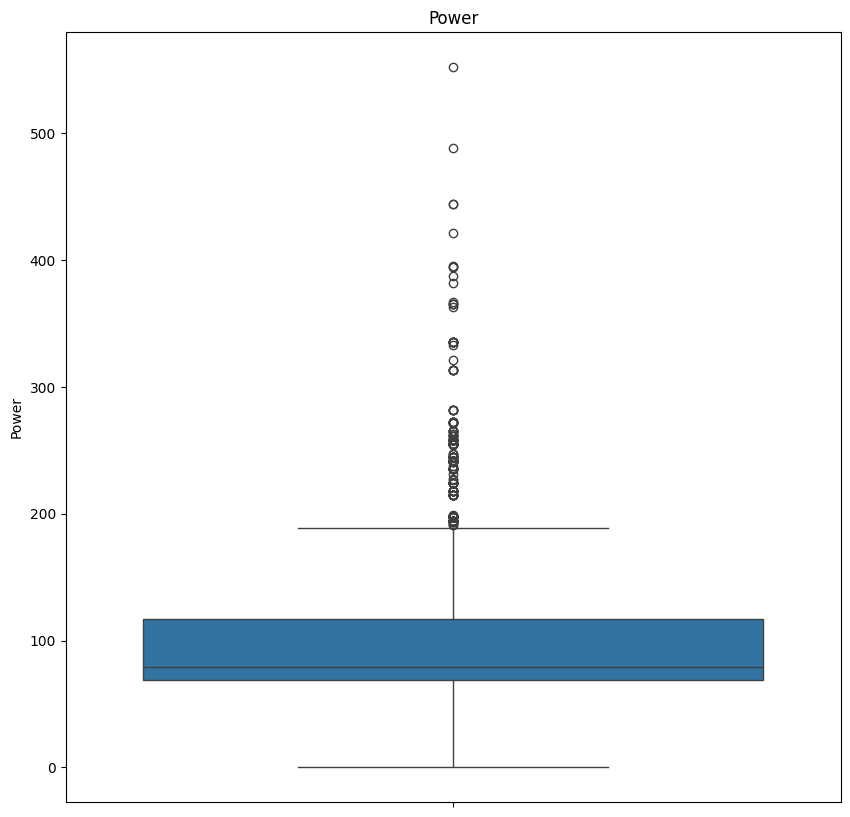

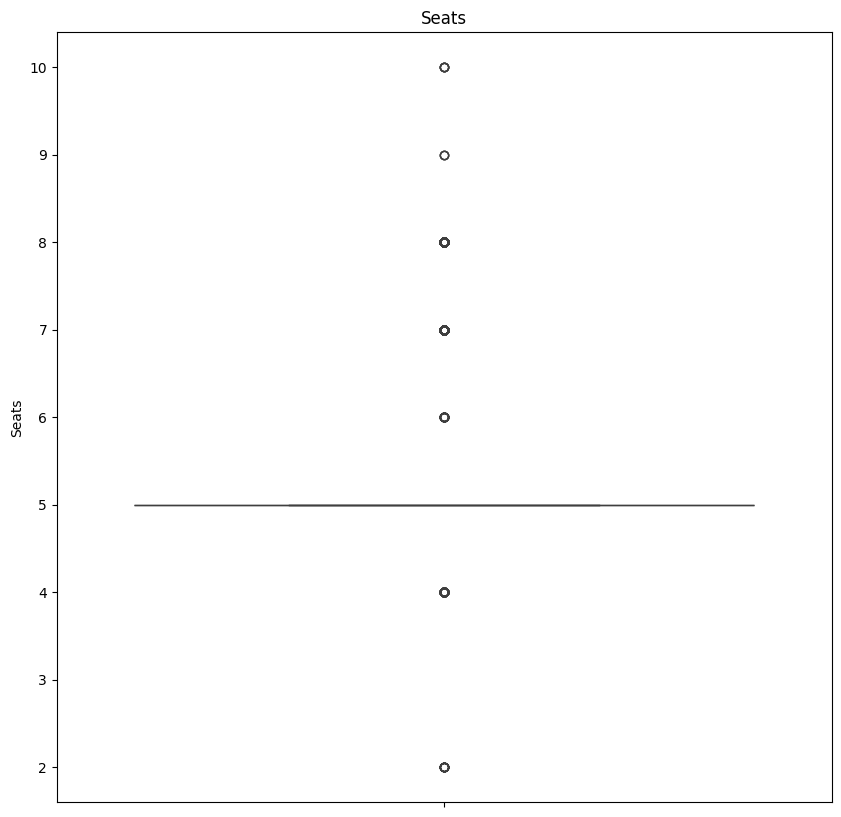

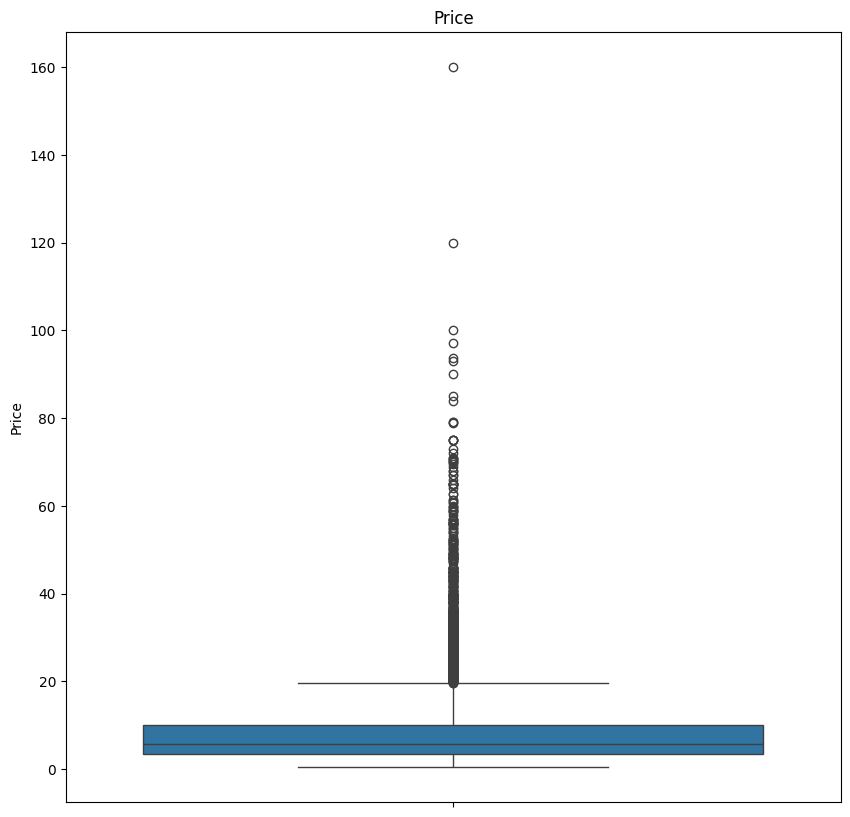

In [21]:
for i in df.select_dtypes("number"):
   plt.figure(figsize=(10,10))
   sns.boxplot(df[i])
   plt.title(f"{i}")

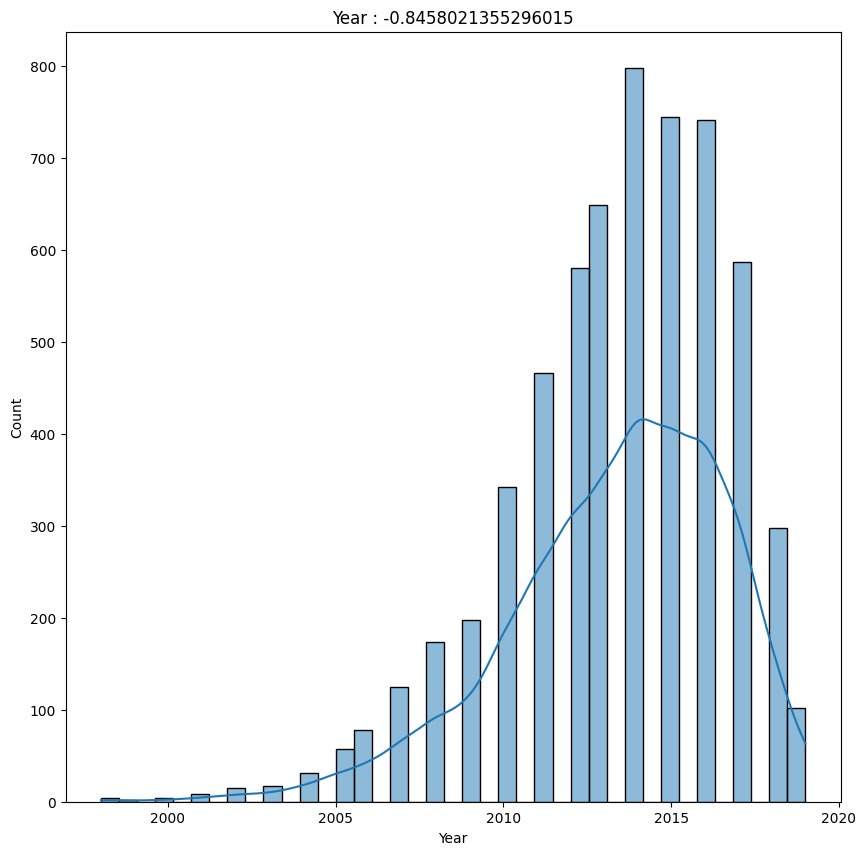

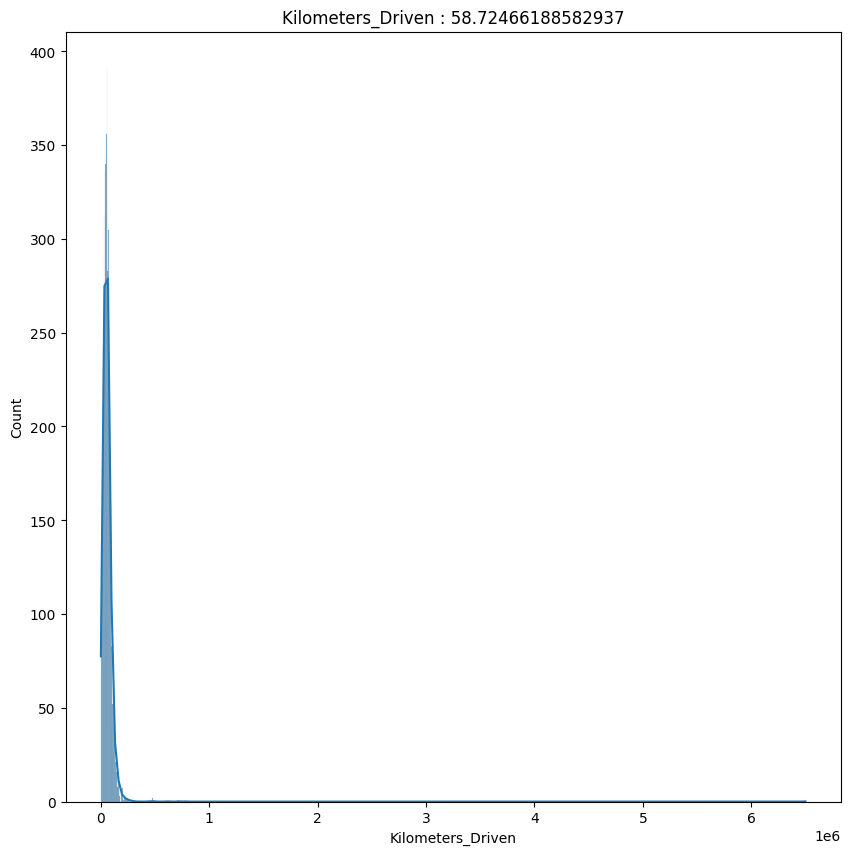

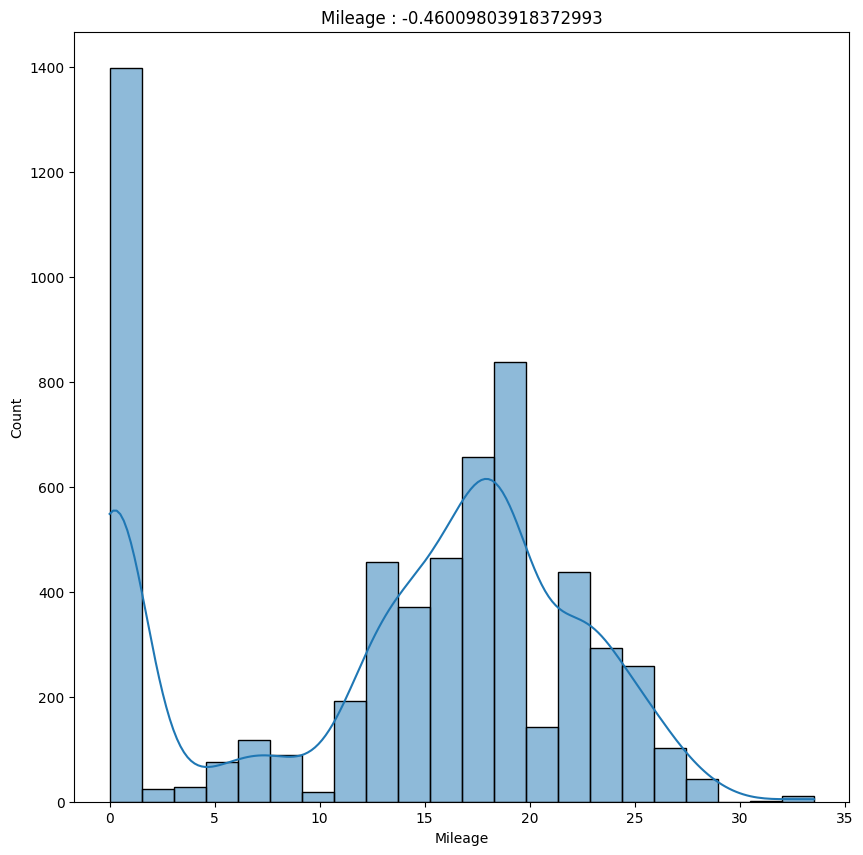

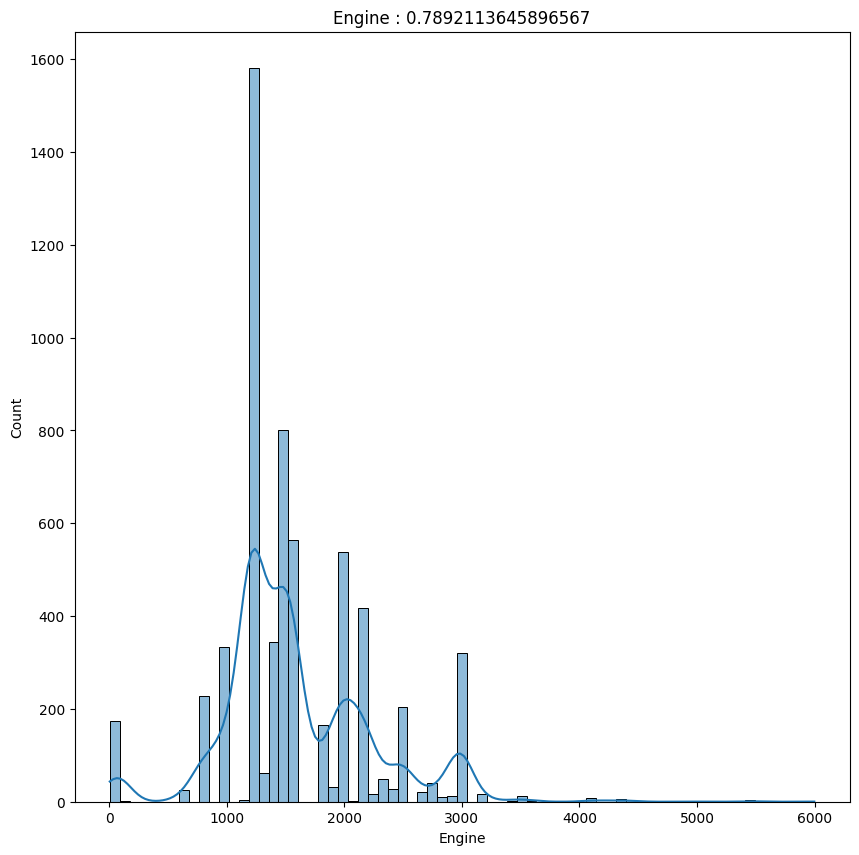

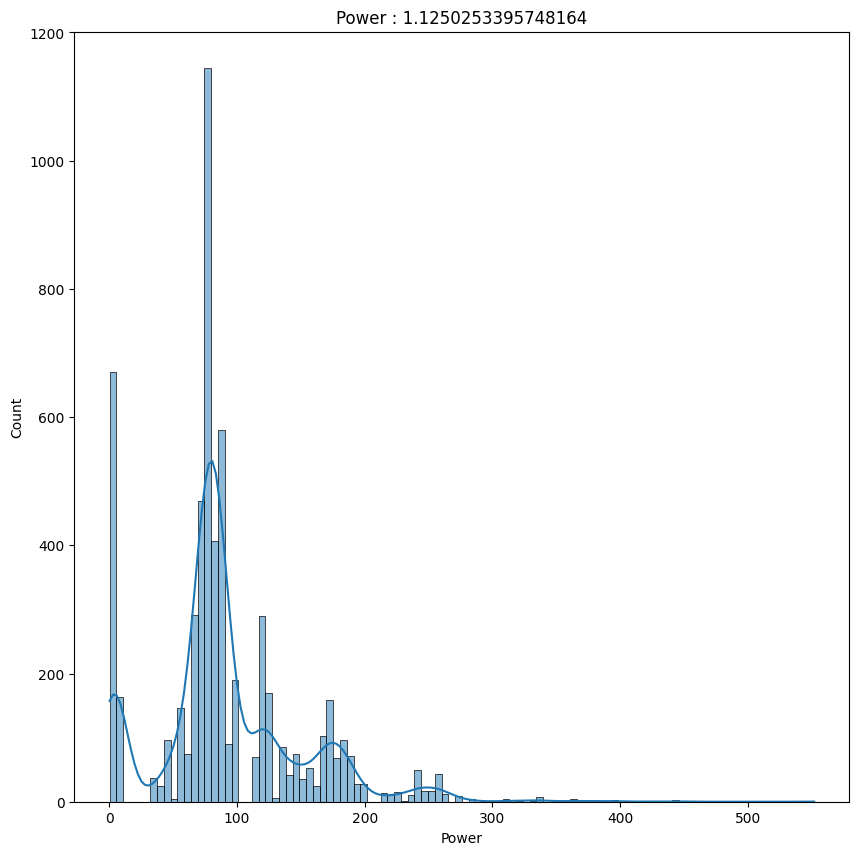

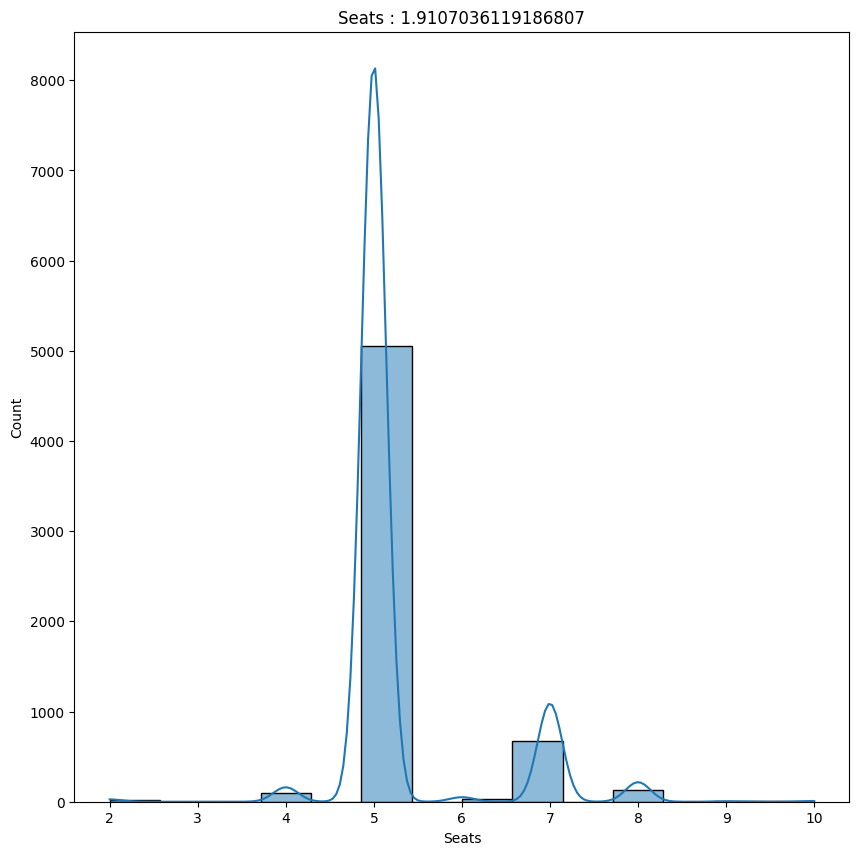

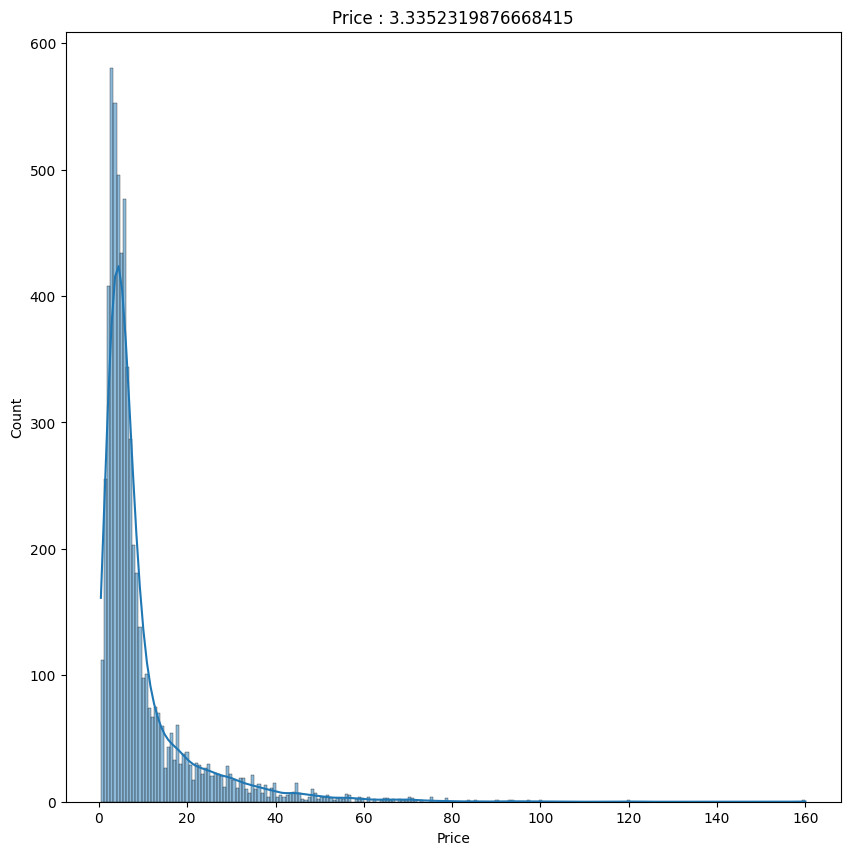

In [23]:
for i in df.select_dtypes("number"):
   plt.figure(figsize=(10,10))
   sns.histplot(df[i],kde=True)
   plt.title(f"{i} : {df[i].skew()}")

In [26]:
df.groupby("Owner_Type")["Price"].mean()

,Price
Owner_Type,
First,9.962445
Fourth & Above,3.280000
Second,7.599886
Third,5.007257


In [28]:
df.groupby("Transmission")["Price"].mean()

,Price
Transmission,
Automatic,19.843971
Manual,5.332703


In [30]:
df.groupby("Fuel_Type")["Price"].mean()

,Price
Fuel_Type,
CNG,3.516786
Diesel,12.840605
Electric,12.875000
LPG,2.487000
Petrol,5.701100


In [32]:
df.groupby("Location")["Price"].mean()

,Price
Location,
Ahmedabad,8.457321
Bangalore,13.328631
Chennai,7.753623
Coimbatore,15.078223
Delhi,9.707726
Hyderabad,9.776550
Jaipur,5.809225
Kochi,11.179186
Kolkata,5.661215


In [36]:
df.groupby("Seats")["Price"].mean()

,Price
Seats,
2.0,55.211875
4.0,20.752525
5.0,8.461438
6.0,9.511290
7.0,14.837463
8.0,7.458881
9.0,4.450000
10.0,4.280000


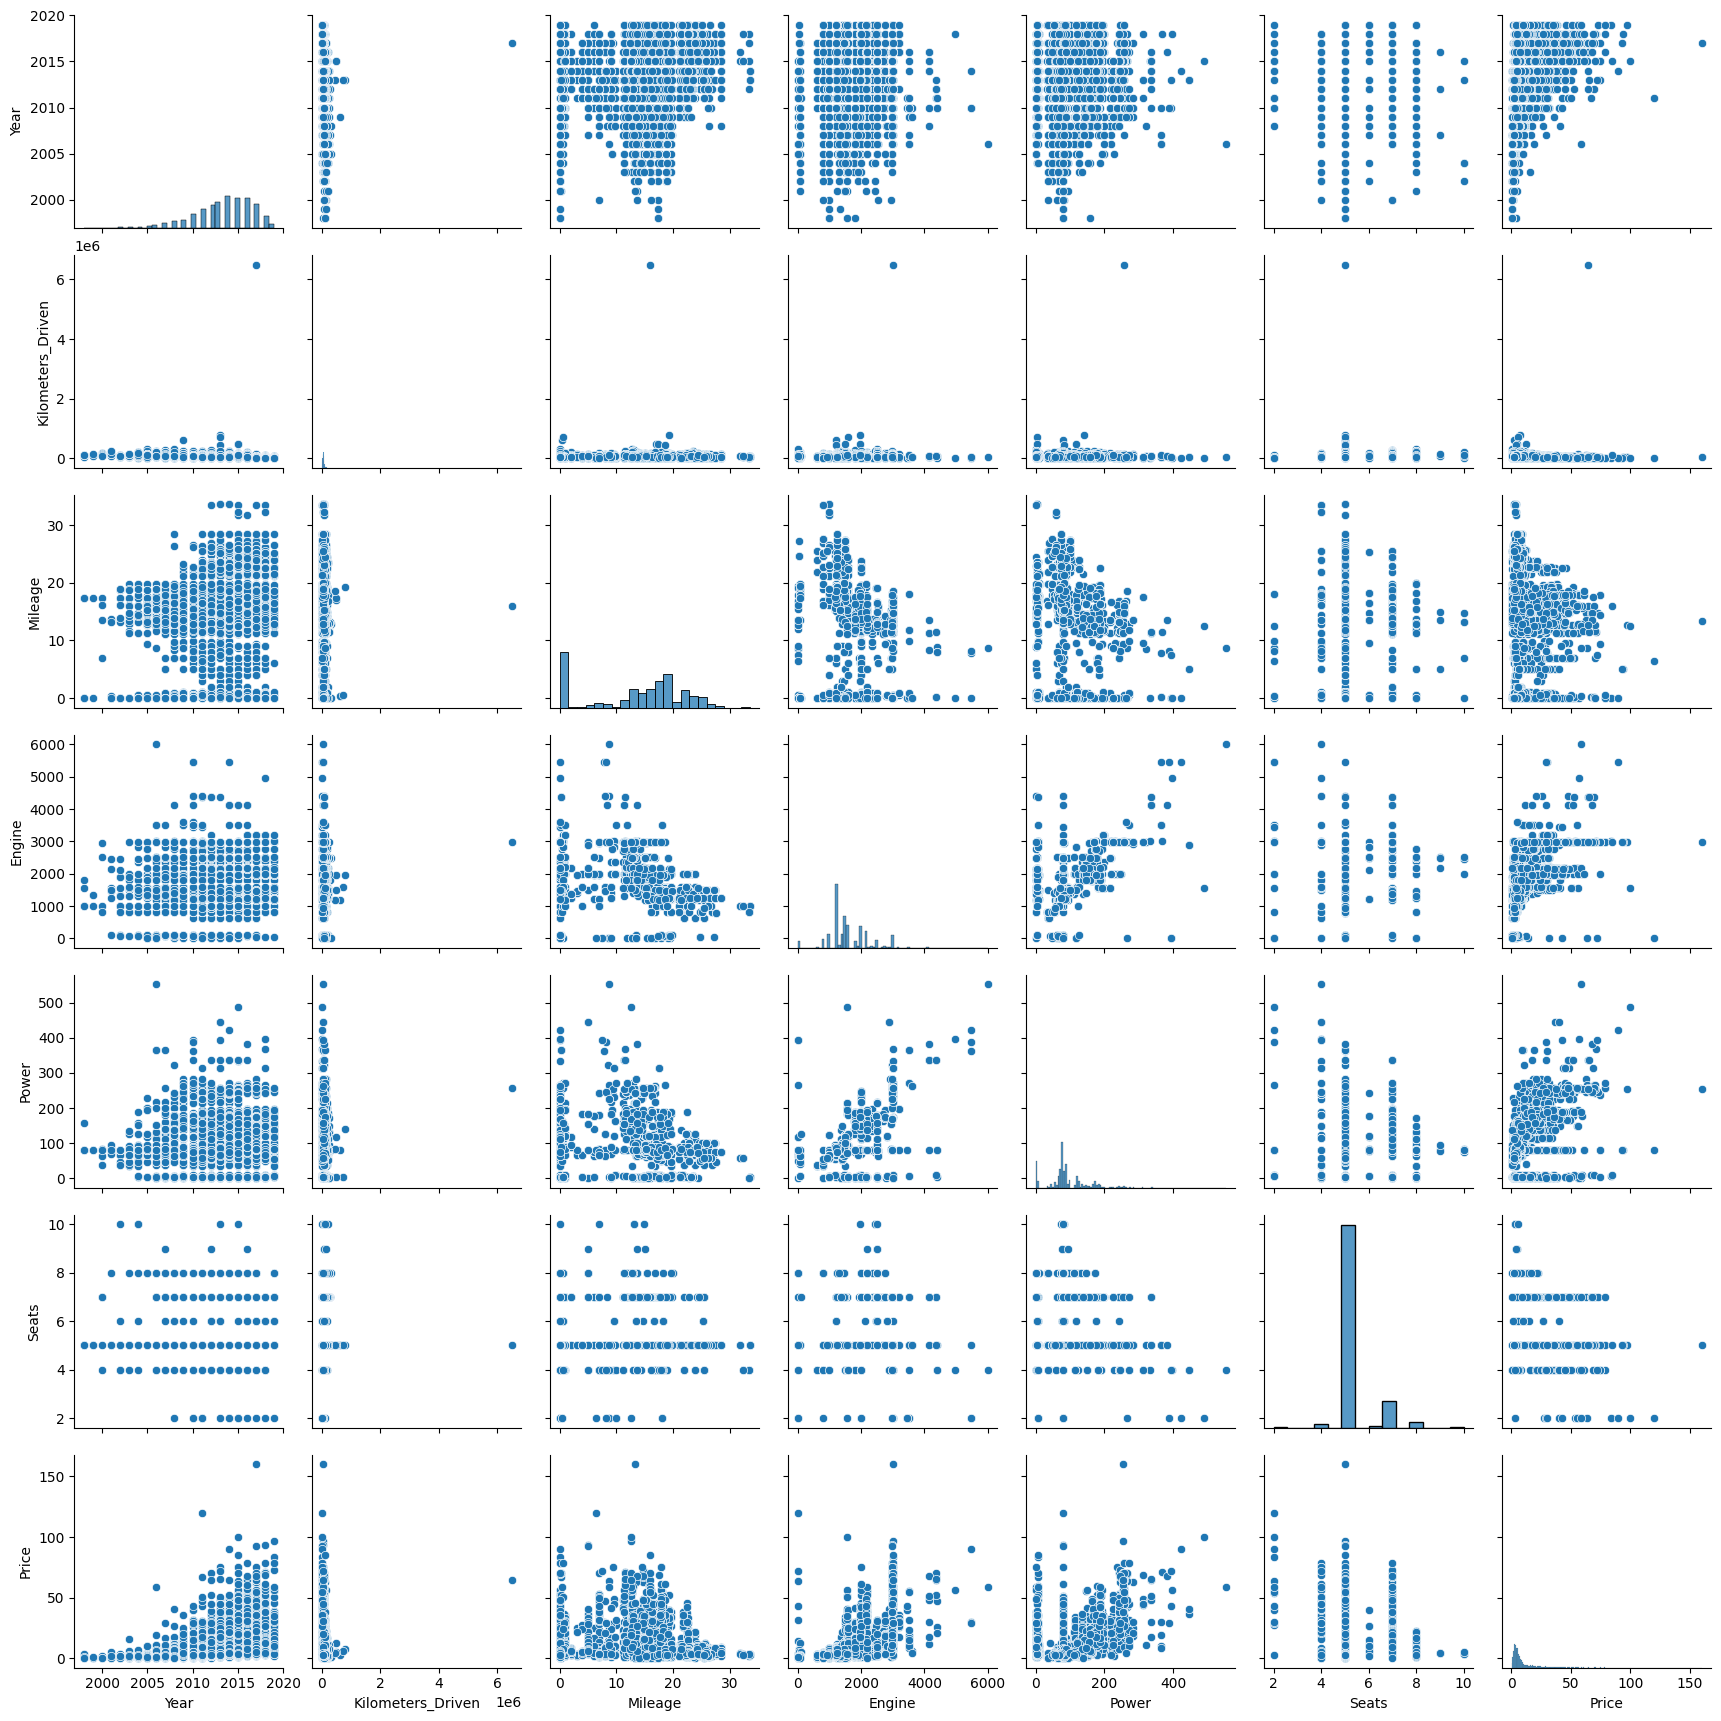

In [33]:
sns.pairplot(df.select_dtypes("number"))

<Axes: >

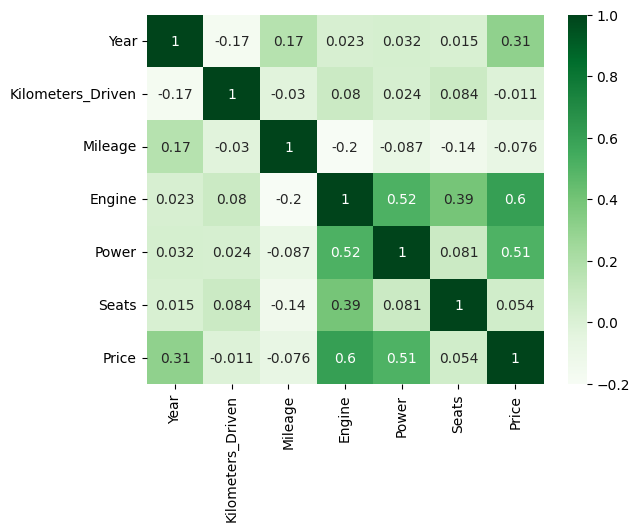

In [37]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True,cmap="Greens")


### Insights 💡

* Data is skewed and has a lot of outliers.

* Apparently, most of the cars were sold in 2014-2016.
* As the number of owners increase the price increases too.
* Automatic cars have 4x the price of manual cars.
* Electric and diesel cars are significantly more expensive than other fuel type cars.
* Two seaters are mostly sports cars, So they are very much more expensive than a normal car. Order follows 2->4->7->others
* Power and engine are correlated.